# Based on [this](https://www.geeksforgeeks.org/python-image-classification-using-keras/) tutorial

The model is set up to distinguish between drakePosting format:
<img src="dankKnowledge/trainingImages/drakePosting/0a9a4c08bb6e1bf4ecb26a345e15a0f09bb46523.jpg" alt="Shrek Anniverssary" width="200"/>

And the scumbag steve format:
<img src="dankKnowledge/trainingImages/scumbagSteve/0cc032b7b8292fb7f6180c00545ff962d0e0edd5.jpg" alt="New Jordans" width="200"/>

In [29]:
# importing libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 


train_data_dir = 'dankKnowledge/trainingImages/'
validation_data_dir = 'dankKnowledge/testingImages/'
nb_train_samples = 400
nb_validation_samples = 100
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first': 
	input_shape = (3, None, None) 
else: 
	input_shape = (None, None, 3) 

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(K.image_data_format()))

#model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss ='binary_crossentropy',
					optimizer ='rmsprop',
				metrics =['accuracy'])

train_datagen = ImageDataGenerator(
				rescale = 1. / 255,
				shear_range = 0.2,
				zoom_range = 0.2,
			horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    batch_size = batch_size, class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    batch_size = batch_size, class_mode ='binary')

model.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs, validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

model.save('drake_v_steve.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, None, None, 32)    416       
_________________________________________________________________
activation_42 (Activation)   (None, None, None, 32)    0         
_________________________________________________________________
average_pooling2d_7 (Average (None, None, None, 32)    0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, None, None, 32)    4128      
_________________________________________________________________
activation_43 (Activation)   (None, None, None, 32)    0         
_________________________________________________________________
average_pooling2d_8 (Average (None, None, None, 32)    0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, None, None, 64)    8256      
__________

## Get the model back and test your own images

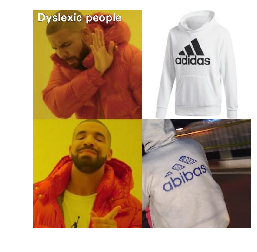

[[0]]
[[0.02581186]]


In [35]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np

model = load_model('drake_v_steve.h5')

testImage = 'dyslexicDrake.jpg'

img = cv2.imread(testImage)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

img = img / 255
img = np.expand_dims(img, axis=0)

print(model.predict_classes(img))
print(model.predict(img))

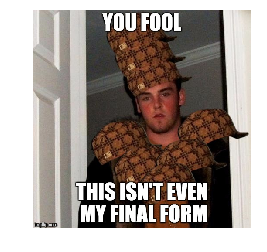

[[1]]
[[0.9160339]]


In [36]:
testImage = 'finalFormSteve.jpg'

img = cv2.imread(testImage)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

img = img / 255
img = np.expand_dims(img, axis=0)

print(model.predict_classes(img))
print(model.predict(img))